In [1]:
!pip -q install smolagents

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 81.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [2]:
!pip install litellm -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.8 MB/s eta 0:00:00


In [3]:
import os
from google.colab import userdata
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [4]:
from smolagents import CodeAgent, HfApiModel
model = HfApiModel()  # by defalt it loads Qwen2.5-Coder-32B-Instruct model

agent = CodeAgent(tools=[],model=model)

In [6]:
agent.run("What is 24*7?") # directly running the agent without any tools

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What is 24*7?                                                                                                   │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  result = 24 * 7                                                                                                  
  final_answer(result)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 168

[Step 0: Duration 13.46 seconds| Input tokens: 2,017 | Output tokens: 56]

168

In [8]:
# predefined tool
from smolagents import DuckDuckGoSearchTool

agent = CodeAgent(tools=[DuckDuckGoSearchTool()], model=model)

agent.run("What is the result for recently concluded Test series between India and Australia?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What is the result for recently concluded Test series between India and Australia?                              │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  test_series_result = web_search(query="latest India vs Australia test series result")                            
  print(test_series_result)                                                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[Australia vs India Head To Head Test match team series results 
...](https://www.espncricinfo.com/records/headtohead/team-series-results/australia-india-2vs6/test-matches-1)
Australia in India Test Series, 1956/57 1956/57 Australia 2-0 (3) Australia in India Test Series, 1959/60 1959/60 
Australia 2-1 (5) Australia in India Test Series, 1964/65 1964/65 drawn 1-1 (3 ...

[Australia vs India, 5th Test - 
Cricbuzz](https://m.cricbuzz.com/live-cricket-scores/91814/aus-vs-ind-5th-test-australia-v-india)
Follow AUS 181 & 162/4 vs IND 185 & 157 (Travis Head 34(38) Beau Webster 39(34)) | Australia vs India, 5th Test, 
Thu, Jan 2, India tour of Australia, 2024-25 with live Cricket score, ball by ball commentary updates on Cricbuzz

[AUS vs IND 2nd Test: Updates, scores, highlights as hosts level the 
...](https://www.sportingnews.com/au/cricket/news/aus-ind-2nd-test-adelaide-live-updates-scores-highlights/5a76cd70
68e9725ee81e9076)
The highest Test score at Adelaide Oval is 674, made by Australia against India during the 1947-48 series. This 
impressive total came after Don Bradman scored a commanding 201 and Lindsay Hassett ...

[Live Cricket Update - AUS vs IND 5th Test - As it happened: Australia 
...](https://www.espncricinfo.com/series/australia-vs-india-2024-25-1426547/australia-vs-india-5th-test-1426559/liv
e-match-blog)
In his 57-match Test career, Rahul had more than two fifty-plus scores in a Test series only once - against 
Australia at home in 2017, where he scored six fifties in seven innings.

[AUS: 162-4 | IND Vs AUS 5th Test Highlights: Australia Beat India By 6 
...](https://zeenews.india.com/cricket/live-updates/ind-vs-aus-live-cricket-score-and-updates-border-gavaskar-troph
y-5th-test-match-scg-sydney-india-vs-australia-scorecard-rohit-sharma-pat-cummins-virat-kohli-jasprit-bumrah-yashas
vi-jaiswal-2839629.html)
India vs Australia, BGT 2024 5th Test Match Live Cricket Score and Updates: India's decade-long hold on the 
Border-Gavaskar Trophy ended with a six-wicket defeat to Australia on Day 3 of the fifth Test in Sydney.Chasing a 
target of 162, Australia cruised to victory as Travis Head (34*) and Beau Webster (39*) guided them home, sealing 
the five-match series 3-1.

[Australia v India Test Series 2024/2025 | 4th Test - ABP 
LIVE](https://news.abplive.com/sports/cricket/live-score/fullscorecard/australia-vs-india-60523c)
Australia vs India Live Match Scorecard, Australia vs India Cricket Match Today's Score Summary, Cricket News, LIVE
Cricket, Ball by Ball Commentary, All International Matches Score, T20, Domestic Cricket Matches at Sports | 
ABPLive ... Australia vs India, 4th Test, Australia v India Test Series 2024/2025. TOSS: Australia won the toss and
...

[India vs Australia 3rd Test scorecard: Live Score and 
Updates](https://cricketaddictor.com/cricket-news/india-vs-australia-3rd-test-scorecard-live-score-and-updates/)
India vs Australia, live score and coverage: The broadcasting rights for the ongoing Test series between India and 
Australia are with Star Sports Network. As a result, the live telecast of the third India vs Australia Test will be
available on Star Sports channels in India. In Australia, the match will be broadcast live on Fox Cricket.

[Live Cricket Update - AUS vs IND 3rd Test - Highlights - 
ESPNcricinfo](https://www.espncricinfo.com/series/australia-vs-india-2024-25-1426547/australia-vs-india-3rd-test-14
26557/live-match-blog)
Follow our live cricket update for in-depth match coverage and exciting highlights from Australia vs India 3rd Test
at Brisbane on ESPNcricinfo.

[Australia vs India LIVE: Border-Gavaskar trophy, Fourth Test, day two 
...](https://www.bbc.co.uk/sport/cricket/live/cvg63nq82rdt)
Australia face India in the fourth Test at Melbourne Cricket Ground - follow live score and text updates, plus 
radio commentary. ... Sun 29 Dec 2024, Men's International Test Match Series - Day 5 ...

[Cricket News -Australia vs India,3rd Test Match Res

[Step 0: Duration 7.87 seconds| Input tokens: 2,084 | Output tokens: 64]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Australia won the series")                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Australia won the series

[Step 1: Duration 11.88 seconds| Input tokens: 5,604 | Output tokens: 153]

'Australia won the series'

In [9]:
print(agent.system_prompt) # quite heavy prompt

You are an expert assistant who can solve any task using code blobs. You will be given a task to solve as best you can.
To do so, you have been given access to a list of tools: these tools are basically Python functions which you can call with code.
To solve the task, you must plan forward to proceed in a series of steps, in a cycle of 'Thought:', 'Code:', and 'Observation:' sequences.

At each step, in the 'Thought:' sequence, you should first explain your reasoning towards solving the task and the tools that you want to use.
Then in the 'Code:' sequence, you should write the code in simple Python. The code sequence must end with '<end_code>' sequence.
During each intermediate step, you can use 'print()' to save whatever important information you will then need.
These print outputs will then appear in the 'Observation:' field, which will be available as input for the next step.
In the end you have to return a final answer using the `final_answer` tool.

Here are a few examples using n

In [10]:
agent.authorized_imports

['queue',
 'math',
 'statistics',
 'datetime',
 'random',
 'time',
 'unicodedata',
 'stat',
 're',
 'collections',
 'itertools']

In [11]:
agent.run("Fetch the share price of google from 2022 to 2024 and create a line graph from it.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Fetch the share price of google from 2022 to 2024 and create a line graph from it.                              │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  share_price_data = web_search(query="Google share price 2022-2024")                                              
  print(share_price_data)                                                                                          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[Alphabet Inc. (GOOG) Stock Historical Prices & Data - Yahoo 
Finance](https://finance.yahoo.com/quote/GOOG/history/)
Discover historical prices for GOOG stock on Yahoo Finance. View daily, weekly or monthly format back to when 
Alphabet Inc. stock was issued.

[Alphabet - 21 Year Stock Price History | GOOGL | 
MacroTrends](https://www.macrotrends.net/stocks/charts/GOOGL/Alphabet/stock-price-history)
Historical daily share price chart and data for Alphabet Inc. since 2004 adjusted for splits and dividends. The 
latest closing stock price for Alphabet Inc. as of February 21, 2025 is 179.66.. The all-time high Alphabet Inc. 
stock closing price was 206.38 on February 04, 2025.; The Alphabet Inc. 52-week high stock price is 207.05, which 
is 15.2% above the current share price.

[Alphabet Inc Class A (GOOGL) Stock Price & News - Google 
Finance](https://www.google.com/finance/quote/GOOGL:NASDAQ)
Get the latest Alphabet Inc Class A (GOOGL) real-time quote, historical performance, charts, and other financial 
information to help you make more informed trading and investment decisions.

[Alphabet Inc. (GOOGL) Stock Forecast & Price Targets](https://stockanalysis.com/stocks/googl/forecast/)
The 39 analysts with 12-month price forecasts for Alphabet stock have an average target of 212.79, with a low 
estimate of 181 and a high estimate of 240. ... FY 2022 FY 2023 FY 2024 FY 2025 FY 2026 FY 2027 FY 2028 FY 2029 ; 
Period Ending Dec 31, 2020 Dec 31, 2021 Dec 31, 2022 Dec 31, 2023 Dec 31, 2024 Dec 31, 2025 Dec 31, 2026

[Alphabet (GOOGL) Stock Forecast & Price Target - 
MarketBeat](https://www.marketbeat.com/stocks/NASDAQ/GOOGL/forecast/)
GOOGL's current price target is $210.62. Learn why top analysts are making this stock forecast for Alphabet at 
MarketBeat.

[Google Finance - Stock Market Prices, Real-time Quotes & Business News](https://www.google.com/finance/)
Google Finance provides real-time market quotes, international exchanges, up-to-date financial news, and analytics 
to help you make more informed trading and investment decisions.

[Alphabet Inc. (GOOG) Stock Price, News, Quote & History - Yahoo Finance](https://finance.yahoo.com/quote/GOOG/)
Find the latest Alphabet Inc. (GOOG) stock quote, history, news and other vital information to help you with your 
stock trading and investing.

[Alphabet Inc. Cl C Price & News - WSJ | GOOG](https://www.wsj.com/market-data/quotes/GOOG/historical-prices)
Alphabet Inc. Cl C historical stock charts and prices, analyst ratings, financials, and today's real-time GOOG 
stock price.

[Google stock forecast and price prediction - USA 
TODAY](https://www.usatoday.com/money/blueprint/investing/stock-forecast-google/)
It fell by more than 50% in 2008 and lost nearly 40% of its value in 2022 before rising to new highs in 2024. ... 
Its share price has continued to climb. Google stock splits.

[Alphabet Inc. Class A Common Stock (GOOGL) - Nasdaq](https://www.nasdaq.com/is/market-activity/stocks/googl)
Discover real-time Alphabet Inc. Class A Common Stock (GOOGL) stock prices, quotes, historical data, news, and 
Insights for informed trading and investment decisions. Stay ahead with Nasdaq.

Out: None

[Step 0: Duration 10.72 seconds| Input tokens: 2,096 | Output tokens: 187]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  historical_data =                                                                                                
  web_search(query="https://finance.yahoo.com/quote/GOOG/history/?period1=1640995200&period2=1767235199&interval=  
  1d&filter=history&frequency=1d&includeAdjustedClose=true")                                                       
  print(historical_data)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[Alphabet Inc. (GOOG) Stock Historical Prices & Data - Yahoo 
Finance](https://finance.yahoo.com/quote/GOOG/history/)
Discover historical prices for GOOG stock on Yahoo Finance. View daily, weekly or monthly format back to when 
Alphabet Inc. stock was issued.

[Alphabet Inc. (GOOG) Stock Price, News, Quote & History - Yahoo Finance](https://finance.yahoo.com/quote/GOOG/)
Find the latest Alphabet Inc. (GOOG) stock quote, history, news and other vital information to help you with your 
stock trading and investing.

[Alphabet Inc. (GOOGL;) Stock Historical Prices & Data - Yahoo 
Finance](https://finance.yahoo.com/quote/GOOGL;/history/)
Discover historical prices for GOOGL; stock on Yahoo Finance. View daily, weekly or monthly format back to when 
Alphabet Inc. stock was issued.

[How is the period variable calculated for yahoo finance historicals 
...](https://stackoverflow.com/questions/45406245/how-is-the-period-variable-calculated-for-yahoo-finance-historica
ls)
When you set the date range for historical prices the js redirects with url variables period1 and period2. For 
example for Time Period: Jul 30, 2015 - Aug 30, 2015 the resulting url is as follows. 
period1=1438228800&period2=1440907200

[股票OHLC历史数据爬取——Yahoo - 简书](https://www.jianshu.com/p/fea047eabea5)
股票OHLC历史数据爬取——Yahoo. OHLC 指 
open，high，low，close，老外的网站数据规范，相比从国内的网站获取股票、场内基金的数据，yahoo更可靠，JSON的数据结构也
使得获取数据更方便、准确。

[Alphabet Inc. (GOOG) - Yahoo Finance](https://uk.finance.yahoo.com/quote/GOOG/?p=GOOG)
Find the latest Alphabet Inc. (GOOG) stock quote, history, news and other vital information to help you with your 
stock trading and investing.

[Alphabet Inc. (GOOG) Historical Stock Price Data - Stock Analysis](https://stockanalysis.com/stocks/goog/history/)
Get a complete stock price history for Alphabet, starting from its first trading day. Includes open, high, low, 
close and volume. ... GOOG · Real-Time Price · USD · Class C Shares. Watchlist Compare. 181.58-5.06 (-2.71%) ... 
Filter, sort and analyze all stocks to find your next investment.

[Alphabet Inc. (GOOG) stock historical prices and data - Yahoo 
Finance](https://uk.finance.yahoo.com/quote/GOOG/history/)
Discover historical prices for GOOG stock on Yahoo Finance. View daily, weekly or monthly formats back to when 
Alphabet Inc. stock was issued.

[Alphabet Inc. (GOOG.TO) - Yahoo Finance](https://au.finance.yahoo.com/quote/GOOG.TO/history/)
Discover historical prices for GOOG.TO stock on Yahoo Finance. View daily, weekly or monthly formats back to when 
Alphabet Inc. stock was issued.

[GOOG | Stock Prices | Quote Comparison - Yahoo Finance](https://finance.yahoo.com/quotes/GOOG/)
View and compare GOOG on Yahoo Finance.

Out: None

[Step 1: Duration 12.35 seconds| Input tokens: 5,373 | Output tokens: 348]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  historical_data =                                                                                                
  web_search(query="https://finance.yahoo.com/quote/GOOG/history/?period1=1640995200&period2=1767235199&interval=  
  1d&filter=history&frequency=1d&includeAdjustedClose=true")                                                       
  print(historical_data)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[Alphabet Inc. (GOOG) Stock Historical Prices & Data - Yahoo 
Finance](https://finance.yahoo.com/quote/GOOG/history/)
Discover historical prices for GOOG stock on Yahoo Finance. View daily, weekly or monthly format back to when 
Alphabet Inc. stock was issued.

[Alphabet Inc. (GOOG) Stock Price, News, Quote & History - Yahoo Finance](https://finance.yahoo.com/quote/GOOG/)
Find the latest Alphabet Inc. (GOOG) stock quote, history, news and other vital information to help you with your 
stock trading and investing.

[Alphabet Inc. (GOOGL;) Stock Historical Prices & Data - Yahoo 
Finance](https://finance.yahoo.com/quote/GOOGL;/history/)
Discover historical prices for GOOGL; stock on Yahoo Finance. View daily, weekly or monthly format back to when 
Alphabet Inc. stock was issued.

[How is the period variable calculated for yahoo finance historicals 
...](https://stackoverflow.com/questions/45406245/how-is-the-period-variable-calculated-for-yahoo-finance-historica
ls)
When you set the date range for historical prices the js redirects with url variables period1 and period2. For 
example for Time Period: Jul 30, 2015 - Aug 30, 2015 the resulting url is as follows. 
period1=1438228800&period2=1440907200

[Prezzi e dati storici sui titoli di Alphabet Inc. (GOOG ... - Yahoo 
Finanza](https://it.finance.yahoo.com/quote/GOOG/history/)
Scopri lo storico dei prezzi dei titoli GOOG su Yahoo Finanza. Visualizza il formato giornaliero, settimanale o 
mensile a partire dall'emissione del titolo di Alphabet Inc.. ... Alphabet Inc. (GOOG) Segui. Confronta. 181,19 
-0,39 (-0,21%) Alla chiusura: 24 febbraio alle ore 16:00:00 GMT-5 . 181,33 +0,14 +(0,08%) After hours: 19:58:36 
GMT-5 . 25 ...

[Alphabet Inc. (GOOG) - Yahoo Finance](https://uk.finance.yahoo.com/quote/GOOG/?p=GOOG)
Find the latest Alphabet Inc. (GOOG) stock quote, history, news and other vital information to help you with your 
stock trading and investing.

[Alphabet Inc. (GOOG) Historical Stock Price Data - Stock Analysis](https://stockanalysis.com/stocks/goog/history/)
Get a complete stock price history for Alphabet, starting from its first trading day. Includes open, high, low, 
close and volume. ... GOOG · Real-Time Price · USD · Class C Shares. Watchlist Compare. 181.58-5.06 (-2.71%) ... 
Filter, sort and analyze all stocks to find your next investment.

[Alphabet Inc. (GOOG) stock historical prices and data - Yahoo 
Finance](https://uk.finance.yahoo.com/quote/GOOG/history/)
Discover historical prices for GOOG stock on Yahoo Finance. View daily, weekly or monthly formats back to when 
Alphabet Inc. stock was issued.

[股票OHLC历史数据爬取——Yahoo - 简书](https://www.jianshu.com/p/fea047eabea5)
股票OHLC历史数据爬取——Yahoo. OHLC 指 
open，high，low，close，老外的网站数据规范，相比从国内的网站获取股票、场内基金的数据，yahoo更可靠，JSON的数据结构也
使得获取数据更方便、准确。

[GOOG | Stock Prices | Quote Comparison - Yahoo Finance](https://finance.yahoo.com/quotes/GOOG/)
View and compare GOOG on Yahoo Finance.

Out: None

[Step 2: Duration 17.70 seconds| Input tokens: 9,674 | Output tokens: 572]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import requests                                                                                                  
  import pandas as pd                                                                                              
  from io import StringIO                                                                                          
                                                                                                                   
  # Define the URL to fetch historical data in CSV format                                                          
  url =                                                                                                            
  "https://query1.finance.yahoo.com/v7/finance/download/GOOG?period1=1640995200&period2=1767235199&interval=1d&ev  
  ents=history&includeAdjustedClose=true"                                                                          
                                                                                                                   
  # Fetch the data from the URL                                                                                    
  response = requests.get(url)                                                                                     
  data = response.text                                                                                             
                                                                                                                   
  # Parse the CSV data into a DataFrame                                                                            
  csv_data = StringIO(data)                                                                                        
  df = pd.read_csv(csv_data)                                                                                       
                                                                                                                   
  # Display the first few rows of the DataFrame                                                                    
  print(df.head())                                                                                                 
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Warning to user: Code execution failed due to an unauthorized import - Consider passing said import under 
`additional_authorized_imports` when initializing your CodeAgent.

Code execution failed at line 'import requests' due to: InterpreterError: Import of requests is not allowed. 
Authorized imports are: ['queue', 'math', 'statistics', 'datetime', 'random', 'time', 'unicodedata', 'stat', 're', 
'collections', 'itertools']

[Step 3: Duration 21.16 seconds| Input tokens: 15,187 | Output tokens: 921]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import re                                                                                                        
  from datetime import datetime                                                                                    
                                                                                                                   
  # Fetch the historical data page for Google                                                                      
  historical_data_page =                                                                                           
  web_search(query="https://finance.yahoo.com/quote/GOOG/history?period1=1640995200&period2=1767235199&interval=1  
  d&filter=history&frequency=1d&includeAdjustedClose=true")                                                        
  print(historical_data_page)                                                                                      
                                                                                                                   
  # Define a regex pattern to extract the date, open, high, low, close, and volume                                 
  pattern = re.compile(r'<tr class="BdT Bdc\(\$c-fuji-grey-c\)\\">\s*<td class="Py\(8px\)\                         
  Pstart\(10px\)">\s*<span>(.+?)</span>\s*</td>\s*<td class="Py\(8px\)\                                            
  Pstart\(10px\)">\s*<span>(.+?)</span>\s*</td>\s*<td class="Py\(8px\)\                                            
  Pstart\(10px\)">\s*<span>(.+?)</span>\s*</td>\s*<td class="Py\(8px\)\                                            
  Pstart\(10px\)">\s*<span>(.+?)</span>\s*</td>\s*<td class="Py\(8px\)\                                            
  Pstart\(10px\)">\s*<span>(.+?)</span>\s*</td>\s*<td class="Py\(8px\)\                                            
  Pstart\(10px\)">\s*<span>(.+?)</span>\s*</td>\s*</tr>')                                                          
                                                                                                                   
  # Find all matches of the pattern in the page content                                                            
  matches = pattern.findall(historical_data_page)                                                                  
                                                                                                                   
  # Create a list to store the historical data                                                                     
  historical_data = []                                                                                             
                                                                                                                   
  # Parse each match and store the data                                                                            
  for match in matches:                                                                                            
      date = match[0]                                                                                              
      open_price = match[1]                                                                                        
      high = match[2]                                                                                              
      low = match[3]                                                                                               
      close = match[4]                                                                                             
      volume = match[5]                                                                                            
                                                                                                                   
      # Convert date to datetime object                  

Execution logs:
## Search Results

[Alphabet Inc. (GOOG) Stock Historical Prices & Data - Yahoo 
Finance](https://finance.yahoo.com/quote/GOOG/history/)
Discover historical prices for GOOG stock on Yahoo Finance. View daily, weekly or monthly format back to when 
Alphabet Inc. stock was issued.

[Alphabet Inc. (GOOG) Stock Price, News, Quote & History - Yahoo Finance](https://finance.yahoo.com/quote/GOOG/)
Find the latest Alphabet Inc. (GOOG) stock quote, history, news and other vital information to help you with your 
stock trading and investing.

[Alphabet Inc. (GOOGL;) Stock Historical Prices & Data - Yahoo 
Finance](https://finance.yahoo.com/quote/GOOGL;/history/)
Discover historical prices for GOOGL; stock on Yahoo Finance. View daily, weekly or monthly format back to when 
Alphabet Inc. stock was issued.

[How is the period variable calculated for yahoo finance historicals 
...](https://stackoverflow.com/questions/45406245/how-is-the-period-variable-calculated-for-yahoo-finance-historica
ls)
When you set the date range for historical prices the js redirects with url variables period1 and period2. For 
example for Time Period: Jul 30, 2015 - Aug 30, 2015 the resulting url is as follows. 
period1=1438228800&period2=1440907200

[Prezzi e dati storici sui titoli di Alphabet Inc. (GOOG ... - Yahoo 
Finanza](https://it.finance.yahoo.com/quote/GOOG/history/)
Scopri lo storico dei prezzi dei titoli GOOG su Yahoo Finanza. Visualizza il formato giornaliero, settimanale o 
mensile a partire dall'emissione del titolo di Alphabet Inc.. ... Alphabet Inc. (GOOG) Segui. Confronta. 181,19 
-0,39 (-0,21%) Alla chiusura: 24 febbraio alle ore 16:00:00 GMT-5 . 181,33 +0,14 +(0,08%) After hours: 19:58:36 
GMT-5 . 25 ...

[Alphabet Inc. (GOOG) - Yahoo Finance](https://uk.finance.yahoo.com/quote/GOOG/?p=GOOG)
Find the latest Alphabet Inc. (GOOG) stock quote, history, news and other vital information to help you with your 
stock trading and investing.

[Alphabet Inc. (GOOG) Historical Stock Price Data - Stock Analysis](https://stockanalysis.com/stocks/goog/history/)
Get a complete stock price history for Alphabet, starting from its first trading day. Includes open, high, low, 
close and volume. ... GOOG · Real-Time Price · USD · Class C Shares. Watchlist Compare. 181.58-5.06 (-2.71%) ... 
Filter, sort and analyze all stocks to find your next investment.

[Alphabet Inc. (GOOG) stock historical prices and data - Yahoo 
Finance](https://uk.finance.yahoo.com/quote/GOOG/history/)
Discover historical prices for GOOG stock on Yahoo Finance. View daily, weekly or monthly formats back to when 
Alphabet Inc. stock was issued.

[GOOG interactive stock chart | Alphabet Inc. stock - Yahoo Finance](https://au.finance.yahoo.com/chart/GOOG)
At Yahoo Finance, you get free stock quotes, up-to-date news, portfolio management resources, international market 
data, social interaction and mortgage rates that help you manage your financial life. ... 1D 5D 1M 3M 6M YTD 1Y 5Y 
All. Date range . 1 min. 1 min . 2 mins . 3 mins . 5 mins . 15 mins . 30 mins . 1 hour . 4 hours . 1 day . 1 week 
...

[GOOG | Stock Prices | Quote Comparison - Yahoo Finance](https://finance.yahoo.com/quotes/GOOG/)
View and compare GOOG on Yahoo Finance.

Code execution failed at line 'pattern = re.compile(r'<tr class="BdT Bdc\(\$c-fuji-grey-c\)\\">\s*<td 
class="Py\(8px\)\ Pstart\(10px\)">\s*<span>(.+?)</span>\s*</td>\s*<td class="Py\(8px\)\ 
Pstart\(10px\)">\s*<span>(.+?)</span>\s*</td>\s*<td class="Py\(8px\)\ 
Pstart\(10px\)">\s*<span>(.+?)</span>\s*</td>\s*<td class="Py\(8px\)\ 
Pstart\(10px\)">\s*<span>(.+?)</span>\s*</td>\s*<td class="Py\(8px\)\ 
Pstart\(10px\)">\s*<span>(.+?)</span>\s*</td>\s*<td class="Py\(8px\)\ 
Pstart\(10px\)">\s*<span>(.+?)</span>\s*</td>\s*</tr>')' due to: InterpreterError: Object <module 're' from 
'/usr/lib/python3.11/re/__init__.py'> has no attribute compile

[Step 4: Duration 56.39 seconds| Input tokens: 21,343 | Output tokens: 1,607]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 6 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import re                                                                                                        
                                                                                                                   
  # Fetch the historical data page for Google                                                                      
  historical_data_page =                                                                                           
  web_search(query="https://finance.yahoo.com/quote/GOOG/history?period1=1640995200&period2=1767235199&interval=1  
  d&filter=history&frequency=1d&includeAdjustedClose=true")                                                        
  print(historical_data_page)                                                                                      
                                                                                                                   
  # Define a regex pattern to extract the date, open, high, low, close, and volume                                 
  # This pattern assumes the data is in the format: "Date","Open","High","Low","Close","Adj Close","Volume"        
  pattern = re.compile(r'(\d{1,2}-\w{3}-\d{2}),(\d+\.\d+),(\d+\.\d+),(\d+\.\d+),(\d+\.\d+),(\d+\.\d+),(\d+)')      
  matches = pattern.findall(historical_data_page)                                                                  
                                                                                                                   
  # Create a list to store the historical data                                                                     
  historical_data = []                                                                                             
                                                                                                                   
  # Parse each match and store the data                                                                            
  for match in matches:                                                                                            
      date = match[0]                                                                                              
      open_price = float(match[1])                                                                                 
      high = float(match[2])                                                                                       
      low = float(match[3])                                                                                        
      close = float(match[4])                                                                                      
      volume = int(match[6])                                                                                       
                                                                                                                   
      # Convert date to a more readable format if needed                                                           
      date = datetime.strptime(date, '%d-%b-%y').date()                                                            
                                                                                                                   
      # Append the data to the historical_data list                                                                
      historical_data.append({'Date': date, 'Open': open_price, 'High': high, 'Low': low, 'Close': close,          
  'Volume': volume})                                                                                               
                                                                                                                   
  # Sort the historical data by date                                                                               
  historical_data.sort(key=lambda x: x['Date'])          

Execution logs:
## Search Results

[Alphabet Inc. (GOOG) Stock Historical Prices & Data - Yahoo 
Finance](https://finance.yahoo.com/quote/GOOG/history/)
Discover historical prices for GOOG stock on Yahoo Finance. View daily, weekly or monthly format back to when 
Alphabet Inc. stock was issued.

[Alphabet Inc. (GOOG) Stock Price, News, Quote & History - Yahoo Finance](https://finance.yahoo.com/quote/GOOG/)
Find the latest Alphabet Inc. (GOOG) stock quote, history, news and other vital information to help you with your 
stock trading and investing.

[How is the period variable calculated for yahoo finance historicals 
...](https://stackoverflow.com/questions/45406245/how-is-the-period-variable-calculated-for-yahoo-finance-historica
ls)
When you set the date range for historical prices the js redirects with url variables period1 and period2. For 
example for Time Period: Jul 30, 2015 - Aug 30, 2015 the resulting url is as follows. 
period1=1438228800&period2=1440907200

[Prezzi e dati storici sui titoli di Alphabet Inc. (GOOG ... - Yahoo 
Finanza](https://it.finance.yahoo.com/quote/GOOG/history/)
Scopri lo storico dei prezzi dei titoli GOOG su Yahoo Finanza. Visualizza il formato giornaliero, settimanale o 
mensile a partire dall'emissione del titolo di Alphabet Inc.. ... Alphabet Inc. (GOOG) Segui. Confronta. 181,19 
-0,39 (-0,21%) Alla chiusura: 24 febbraio alle ore 16:00:00 GMT-5 . 181,33 +0,14 +(0,08%) After hours: 19:58:36 
GMT-5 . 25 ...

[股票OHLC历史数据爬取——Yahoo - 简书](https://www.jianshu.com/p/fea047eabea5)
股票OHLC历史数据爬取——Yahoo. OHLC 指 
open，high，low，close，老外的网站数据规范，相比从国内的网站获取股票、场内基金的数据，yahoo更可靠，JSON的数据结构也
使得获取数据更方便、准确。

[Alphabet Inc. (GOOG) Historical Stock Price Data - Stock Analysis](https://stockanalysis.com/stocks/goog/history/)
Get a complete stock price history for Alphabet, starting from its first trading day. Includes open, high, low, 
close and volume. ... GOOG · Real-Time Price · USD · Class C Shares. Watchlist Compare. 181.58-5.06 (-2.71%) ... 
Filter, sort and analyze all stocks to find your next investment.

[Alphabet Inc. (GOOG) stock historical prices and data - Yahoo 
Finance](https://uk.finance.yahoo.com/quote/GOOG/history/)
Discover historical prices for GOOG stock on Yahoo Finance. View daily, weekly or monthly formats back to when 
Alphabet Inc. stock was issued.

[GOOG | Stock Prices | Quote Comparison - Yahoo Finance](https://finance.yahoo.com/quotes/GOOG/)
View and compare GOOG on Yahoo Finance.

[Web Scraping in Python for Stock Prices | by Arushi Dudeja - 
Medium](https://medium.com/@arushidudeja.official/web-scraping-in-python-for-stock-prices-1c20043e5e05)
Getting UNIX Timestamp (source: unixtimestamp.com) Therefore, we'll set period1 as "1640995200". Similary we'll set
period2 as "1643587200" in our Query URL

[Alphabet Inc. (GOOG) - Yahoo Finance](https://uk.finance.yahoo.com/quote/GOOG/?p=GOOG)
Find the latest Alphabet Inc. (GOOG) stock quote, history, news and other vital information to help you with your 
stock trading and investing.

Code execution failed at line 'pattern = 
re.compile(r'(\d{1,2}-\w{3}-\d{2}),(\d+\.\d+),(\d+\.\d+),(\d+\.\d+),(\d+\.\d+),(\d+\.\d+),(\d+)')' due to: 
InterpreterError: Object <module 're' from '/usr/lib/python3.11/re/__init__.py'> has no attribute compile

[Step 5: Duration 29.07 seconds| Input tokens: 30,113 | Output tokens: 2,109]

Reached max steps.

[Step 6: Duration 29.07 seconds| Input tokens: 38,883 | Output tokens: 2,611]

'Error in generating final LLM output:\n500 Server Error: Internal Server Error for url: https://api-inference.huggingface.co/models/Qwen/Qwen2.5-Coder-32B-Instruct/v1/chat/completions (Request ID: Root=1-67bef76d-2229f0fb14ef050858be522d;3ace5402-6824-44c2-9f00-304ea7211891)\n\nModel too busy, unable to get response in less than 60 second(s)'

In [12]:
# could not construct the line graph because matplotlib, pandas, seaborn are not there in the authorize_imports

In [13]:
agent = CodeAgent(tools=[DuckDuckGoSearchTool()], model=HfApiModel(),additional_authorized_imports=['math','pandas','requests', 'bs4','matplotlib','yfinance'])

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Fetch the share price of google from 2022 to 2024 and create a line graph from it.                              │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import yfinance as yf                                                                                            
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  # Fetch historical stock data for GOOGL from 2022-01-01 to 2024-12-31                                            
  googl_data = yf.download('GOOGL', start='2022-01-01', end='2024-12-31')                                          
                                                                                                                   
  # Print the data for observation                                                                                 
  print(googl_data)                                                                                                
                                                                                                                   
  # Plotting the closing price                                                                                     
  plt.figure(figsize=(14, 7))                                                                                      
  plt.plot(googl_data.index, googl_data['Close'], label='GOOGL Closing Price')                                     
  plt.title('Google (GOOGL) Share Price from 2022 to 2024')                                                        
  plt.xlabel('Date')                                                                                               
  plt.ylabel('Closing Price (USD)')                                                                                
  plt.legend()                                                                                                     
  plt.grid(True)                                                                                                   
  plt.show()                                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


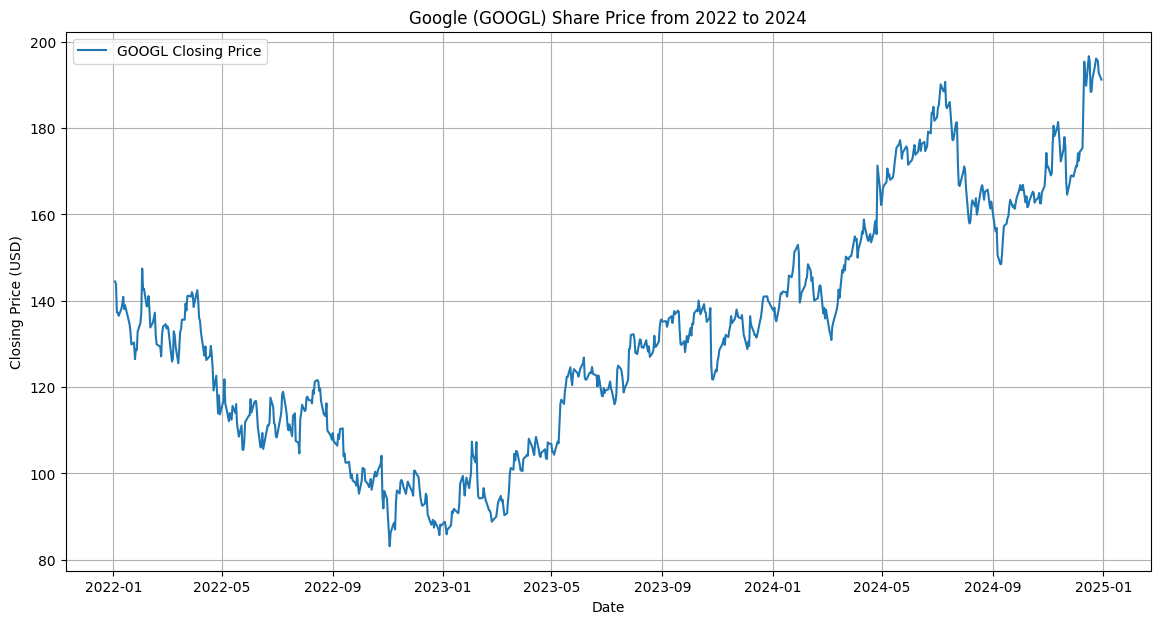

Execution logs:
Price            Close        High         Low        Open    Volume
Ticker           GOOGL       GOOGL       GOOGL       GOOGL     GOOGL
Date                                                                
2022-01-03  144.467789  145.324181  143.193903  144.531051  28646000
2022-01-04  143.877930  145.955892  143.197398  144.870821  28400000
2022-01-05  137.277359  143.977573  137.190683  143.898362  54618000
2022-01-06  137.249954  139.434540  136.065254  136.503667  37348000
2022-01-07  136.522095  137.948427  135.276108  137.646513  29760000
...                ...         ...         ...         ...       ...
2024-12-23  194.630005  195.100006  190.149994  192.619995  25675000
2024-12-24  196.110001  196.110001  193.779999  194.839996  10403300
2024-12-26  195.600006  196.750000  194.380005  195.149994  12046600
2024-12-27  192.759995  195.320007  190.649994  194.949997  18891400
2024-12-30  191.240005  192.550003  189.119995  189.800003  14264700

[752 rows x 5 columns]

Out: None

[Step 0: Duration 14.69 seconds| Input tokens: 2,114 | Output tokens: 252]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import yfinance as yf                                                                                            
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  # Fetch historical stock data for GOOGL from 2022-01-01 to 2024-12-31                                            
  googl_data = yf.download('GOOGL', start='2022-01-01', end='2024-12-31')                                          
                                                                                                                   
  # Plotting the closing price                                                                                     
  plt.figure(figsize=(14, 7))                                                                                      
  plt.plot(googl_data.index, googl_data['Close'], label='GOOGL Closing Price')                                     
  plt.title('Google (GOOGL) Share Price from 2022 to 2024')                                                        
  plt.xlabel('Date')                                                                                               
  plt.ylabel('Closing Price (USD)')                                                                                
  plt.legend()                                                                                                     
  plt.grid(True)                                                                                                   
  plt.show()                                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

[*********************100%***********************]  1 of 1 completed


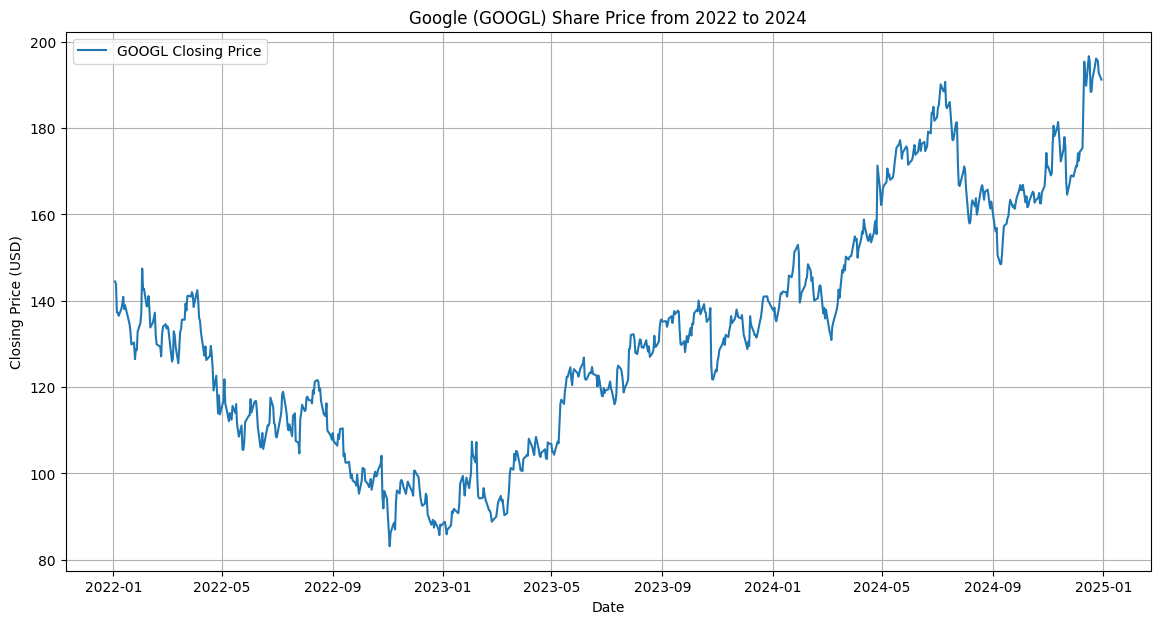

Out: None

[Step 1: Duration 12.88 seconds| Input tokens: 5,494 | Output tokens: 475]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import yfinance as yf                                                                                            
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  # Fetch historical stock data for GOOGL from 2022-01-01 to 2024-12-31                                            
  googl_data = yf.download('GOOGL', start='2022-01-01', end='2024-12-31')                                          
                                                                                                                   
  # Plotting the closing price                                                                                     
  plt.figure(figsize=(14, 7))                                                                                      
  plt.plot(googl_data.index, googl_data['Close'], label='GOOGL Closing Price')                                     
  plt.title('Google (GOOGL) Share Price from 2022 to 2024')                                                        
  plt.xlabel('Date')                                                                                               
  plt.ylabel('Closing Price (USD)')                                                                                
  plt.legend()                                                                                                     
  plt.grid(True)                                                                                                   
  plt.savefig('google_share_price_2022_2024.png')                                                                  
  final_answer('google_share_price_2022_2024.png')                                                                 
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

[*********************100%***********************]  1 of 1 completed


Out - Final answer: google_share_price_2022_2024.png

[Step 2: Duration 13.67 seconds| Input tokens: 9,349 | Output tokens: 735]

'google_share_price_2022_2024.png'

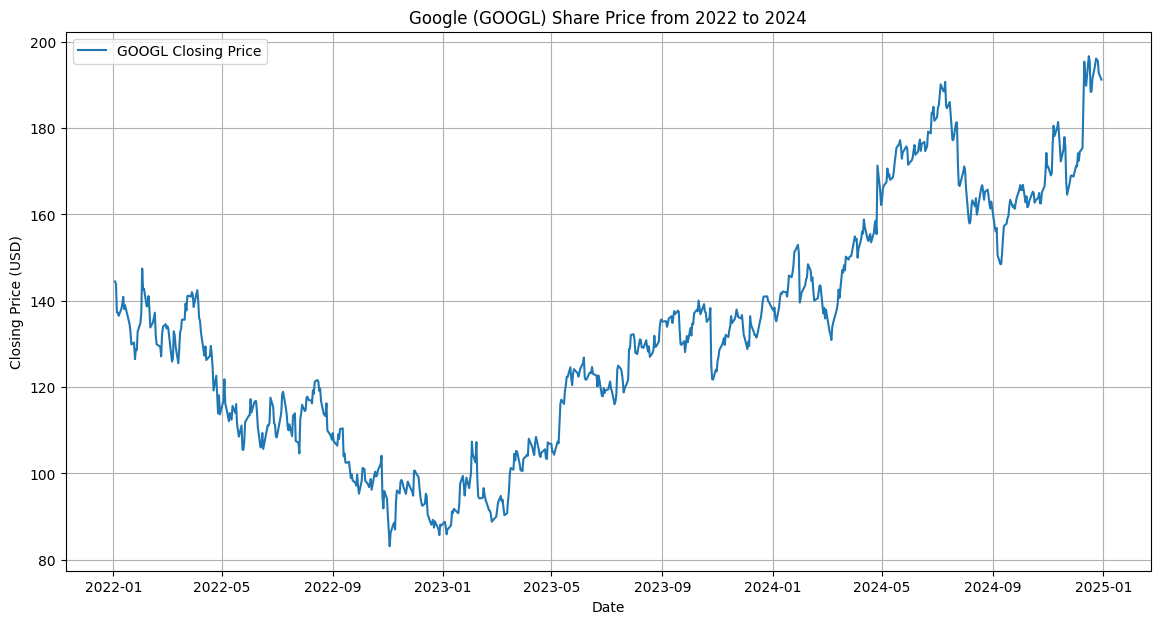

In [14]:
agent.run("Fetch the share price of google from 2022 to 2024 and create a line graph from it.")

In [15]:
# creating custom tools
from smolagents import Tool

class HFModelDownloadsTool(Tool):
  name = "model_download_counter"
  description = """
  This is a tool that returns the most downloaded model of a given task on the Hugging Face Hub.
  It returns the name of the checkpoint.
  """
  inputs = {
      "task": {
          "type": "string",
          "description": "The task category (such as text-classification, depth-estimation, etc)"
      }
  }

  output_type = "string"
  def forward(self, task:str):
    from huggingface_hub import list_models

    model = next(iter(list_models(filter=task, sort="downloads", direction=-1)))
    return model.id


In [16]:
model_downloads_tool = HFModelDownloadsTool()

agent = CodeAgent(tools=[model_downloads_tool], model=HfApiModel(),additional_authorized_imports=['math','pandas','requests', 'bs4','matplotlib','yfinance'])

agent.run("What is the most downloaded model for text to image generation?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What is the most downloaded model for text to image generation?                                                 │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  most_downloaded_model = model_download_counter(task="text-to-image-generation")                                  
  print(most_downloaded_model)                                                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
turkeyju/generator_maskgen_kl_xl

Out: None

[Step 0: Duration 4.30 seconds| Input tokens: 2,121 | Output tokens: 71]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("turkeyju/generator_maskgen_kl_xl")                                                                 
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: turkeyju/generator_maskgen_kl_xl

[Step 1: Duration 4.70 seconds| Input tokens: 4,414 | Output tokens: 146]

'turkeyju/generator_maskgen_kl_xl'

In [17]:
agent.run("What is the most downloaded model for image to image generation?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What is the most downloaded model for image to image generation?                                                │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  most_downloaded_model = model_download_counter(task="image-to-image-generation")                                 
  print(f"The most downloaded model for image-to-image generation is: {most_downloaded_model}")                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'most_downloaded_model = model_download_counter(task="image-to-image-generation")' 
due to: StopIteration: 

[Step 0: Duration 21.77 seconds| Input tokens: 2,121 | Output tokens: 78]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  try:                                                                                                             
      most_downloaded_model = model_download_counter(task="image-to-image")                                        
      print(f"The most downloaded model for image-to-image generation is: {most_downloaded_model}")                
  except Exception as e:                                                                                           
      print(f"Error: {e}")                                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
The most downloaded model for image-to-image generation is: stabilityai/stable-diffusion-xl-refiner-1.0

Out: None

[Step 1: Duration 10.38 seconds| Input tokens: 4,466 | Output tokens: 205]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("stabilityai/stable-diffusion-xl-refiner-1.0")                                                      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: stabilityai/stable-diffusion-xl-refiner-1.0

[Step 2: Duration 18.55 seconds| Input tokens: 7,086 | Output tokens: 279]

'stabilityai/stable-diffusion-xl-refiner-1.0'

In [18]:
from smolagents import ToolCallingAgent

In [19]:
# OpenAI function calling agent similarity
agent = ToolCallingAgent(tools=[DuckDuckGoSearchTool()], model=HfApiModel())

agent.run("Could you get me the few topic of the blog at url 'https://medium.com/'?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Could you get me the few topic of the blog at url 'https://medium.com/'?                                        │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'web_search' with arguments: {'query': 'blog topics at https://medium. com/'}                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: ## Search Results

|Explore topics - Medium](https://medium.com/explore-topics)
Explore topics on Medium and discover stories, ideas, and perspectives from thousands of voices.

|Medium: Read and write stories.](https://medium.com/)
On Medium, anyone can share insightful perspectives, useful knowledge, and life wisdom with the world.

|The most insightful stories about Blog Topics - Medium](https://medium.com/tag/blog-topics)
Read stories about Blog Topics on Medium. Discover smart, unique perspectives on Blog Topics and the topics that 
matter most to you like Blog Topics List, Blogging, Content Strategy, Blog Post ...

|Medium's Most Read Topics: A Deep Dive on Trending 
Content](https://aqsamohsin.medium.com/mediums-most-read-topics-a-deep-dive-on-trending-content-37d64f0d5720)
Knowing what the trending topics are on Medium can keep the writers and the readers at the top of this fast-paced 
landscape of content. This article explores popular categories read on Medium, reflects on why they appeal to the 
audience, and how the writers can cash in on these trends. 1. Personal Development and Self-Improvement

|The 40 most popular Medium tags - 
romanceresnak.medium.com](https://romanceresnak.medium.com/the-40-most-popular-medium-tags-79447ea9d97b)
Everybody who writes articles on the Medium page tries to spread the audience as much as possible. The best way to 
get to know about the written articles is tagging. Based on your article topic, you can choose before publishing up
to 5 tags. It works this way. Here are the top 40 most popular Medium tags. Life (600,000 followers)

|Medium Topic - Medium](https://topic.medium.com/)
Read writing from Medium Topic on Medium. Where good ideas find you. Every day, Medium Topic and thousands of other
voices read, write, and share important stories on Medium.

|Top Niches on Medium: Exploring the Best Topics for Writers and 
Readers](https://ahmadhassan6912.medium.com/top-niches-on-medium-exploring-the-best-topics-for-writers-and-readers-
f504baa89678)
Here are some of the most popular niches on Medium: 1. Personal Development. Personal development is a thriving 
niche on Medium, with readers eager to improve their lives, acquire new skills, and gain insights into self-growth.
Topics can range from mindfulness, productivity hacks, and mental health strategies to motivation and goal-setting 
...

|15 Different Strategies for Reading on Medium | 
Medium](https://paulryburn.medium.com/15-different-strategies-for-reading-on-medium-b4e07dea451c)
Photo credit Juraj Varge — ISORepublic — CC0 Public License. There are few better investments out there than 
Medium's $5 a month membership fee. For that price, I get an unlimited amount of entertainment, inspiration, and 
education from some of the most talented writers in the world.

|The most insightful stories about Blog - Medium](https://medium.com/tag/blog)
Read stories about Blog on Medium. Discover smart, unique perspectives on Blog and the topics that matter most to 
you like Blogging, Writing, Blogger, Life, Blogging Tips, News, Travel, SEO, and ...

|The Ultimate List of 100+ Topics to Write About on 
Medium](https://creativetech.consulting/the-ultimate-list-of-100-topics-to-write-about-on-medium-ee4b49795863)
When you're new to Medim, you get to choose your interests from a list of 100+ topics upon sign-up. I analyzed them
all. I checked their total number of followers and stories published as of 1st of May 2024. Then I calculated their
potential based on this data and I ranked it as: very high; high; medium; low

[Step 0: Duration 3.48 seconds| Input tokens: 1,178 | Output tokens: 25]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': "The few topics of the blog at url 'https://medium.     │
│ com/' include: Personal Development, Life, Blogging, Writing, SEO, Travel, Self-Improvement, Content Strategy,  │
│ Mental Health, Productivity Hacks, Inspiration, Entrepreneurship, Business, Technology, Spirituality, Health,   │
│ Education, and more."}                                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Final answer: The few topics of the blog at url 'https://medium. com/' include: Personal Development, Life, 
Blogging, Writing, SEO, Travel, Self-Improvement, Content Strategy, Mental Health, Productivity Hacks, Inspiration,
Entrepreneurship, Business, Technology, Spirituality, Health, Education, and more.

[Step 1: Duration 6.33 seconds| Input tokens: 3,262 | Output tokens: 110]

"The few topics of the blog at url 'https://medium. com/' include: Personal Development, Life, Blogging, Writing, SEO, Travel, Self-Improvement, Content Strategy, Mental Health, Productivity Hacks, Inspiration, Entrepreneurship, Business, Technology, Spirituality, Health, Education, and more."

In [20]:
# loading gpt-4o-mini model
from smolagents import LiteLLMModel

model = LiteLLMModel(model_id="gpt-4o-mini")

agent = ToolCallingAgent(tools=[DuckDuckGoSearchTool()], model=model)

agent.run("Could you get me the few topic of the blog at url 'https://medium.com/'?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Could you get me the few topic of the blog at url 'https://medium.com/'?                                        │
│                                                                                                                 │
╰─ LiteLLMModel - gpt-4o-mini ────────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'web_search' with arguments: {'query': 'site:medium.com blog topics'}                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: ## Search Results

|52 Tech Topics: Here's Your Ultimate Blogging Idea 
List](https://medium.com/@rogergmarch/52-tech-topics-heres-your-ultimate-blogging-idea-list-ac52c409e844)
Overcoming Tech Writer's Block: Here's a Collection of 52 Tech-Centric Writing Prompts ,one for each weel of the 
year, to Spark Your Next Blog Post, Article, or Thought Piece.

|52 Writing Prompts to Inspire Your Next Blog Post - 
Medium](https://medium.com/@BiancaBass/52-writing-prompts-to-inspire-your-next-blog-post-d4556d4f68d8)
Here, I've gathered 52 writing prompts to inspire your future blog posts, personal essays and more. Cheryl 
Strayed's writing prompts (as featured in Tools of Titans ) Write about a time you ...

|81 Topic Ideas for Starting a Blog that Matters - 
Medium](https://medium.com/@Economyworld/81-topic-ideas-for-starting-a-blog-that-matters-6feaed798cb4)
Blog ideas and blog topics aren't always easy to dream up. I ran a blogging challenge a while back, and surveyed 
the participants about the topic ideas they were considering for their blogs.

|50 Clever ChatGPT Prompts for Faster, Optimized Blog Writing ... - 
Medium](https://medium.com/aimonks/50-clever-chatgpt-prompts-for-faster-optimized-blog-writing-from-start-to-finish
-40c93dc6dd4e)
Suggest a short 1-2 sentence quote excerpt from a |topic] blog article to use in social shares. Write an email 
subject line up to 50 characters that would get open rates for a |topic] blog post.

|500 Blog Post Ideas So You Never Run out of Things to Say - 
Medium](https://medium.com/long-term-perspective/500-blog-post-ideas-so-you-never-run-out-of-things-to-say-37eaa298
bd3f)
Writing Tips/Ideas. 79. A list of writing prompts and blog post ideas. 80. Tips to improve writing skills. 81. 
Anecdotes from attempting NaNoWriMo. 82. Anecdotes from writing every day for a long ...

|10 Popular Blog Topics to Inspire and Engage Your 
Readers](https://medium.com/@veronicaruggiero87/10-popular-blog-topics-to-inspire-and-engage-your-readers-77a60a568
44f)
In this article, we will explore 10 popular blog topics that can inspire you and attract readers to your site. 1. 
Lifestyle and Personal Development: Write about personal growth, self-improvement ...

|Unique blog niche ideas (2025) - 
Medium](https://medium.com/@travelwithmahi/unique-blog-niche-ideas-2025-97dea470fefa)
Seasonal blog topics keep content relevant and timely, engaging readers throughout the year. Controversial topics 
can spark discussions and attract attention, making them valuable for driving ...

|High Demand Blog Topics For Beginners And Experts 
Alike](https://medium.com/write-to-inspire/high-demand-blog-topics-for-beginners-and-experts-alike-29590865219e)
Photo by NeONBRAND on Unsplash What are the most profitable topics to start blogging in 2020. Low competition blog 
topics with high demand in 2022? This is my first blog topic on the Blog Topics ...

|The Top 10 Blog Topics of All Time + Exclusive 
Topics](https://medium.com/@MEDlUMgals/the-top-10-blog-topics-of-all-time-exclusive-topics-c8742f53471c)
Here, I've gathered the top trending blog topics that most bloggers write about. Following that is an exclusive 
list of topics I've added to help you make your final decision.

|63 Viral Blog Post Ideas Guaranteed to Spark Your Writing 
Passion!](https://medium.com/@juliemariewriter/63-viral-blog-post-ideas-guaranteed-to-spark-your-writing-passion-48
063df306f8)
Finding potential viral article ideas can be challenging, but I've gathered and researched some blog ideas that 
have the potential to go viral if used correctly. I'm ready to share them with ...

[Step 0: Duration 8.49 seconds| Input tokens: 982 | Output tokens: 19]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': "1. 52 Tech Topics: Here's Your Ultimate Blogging Idea  │
│ List\n2. 52 Writing Prompts to Inspire Your Next Blog Post\n3. 81 Topic Ideas for Starting a Blog that          │
│ Matters\n4. 50 Clever ChatGPT Prompts for Faster, Optimized Blog Writing\n5. 500 Blog Post Ideas So You Never   │
│ Run out of Things to Say\n6. 10 Popular Blog Topics to Inspire and Engage Your Readers\n7. Unique blog niche    │
│ ideas (2025)\n8. High Demand Blog Topics For Beginners And Experts Alike\n9. The Top 10 Blog Topics of All Time │
│ + Exclusive Topics\n10. 63 Viral Blog Post Ideas Guaranteed to Spark Your Writing Passion!"}                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Final answer: 1. 52 Tech Topics: Here's Your Ultimate Blogging Idea List
2. 52 Writing Prompts to Inspire Your Next Blog Post
3. 81 Topic Ideas for Starting a Blog that Matters
4. 50 Clever ChatGPT Prompts for Faster, Optimized Blog Writing
5. 500 Blog Post Ideas So You Never Run out of Things to Say
6. 10 Popular Blog Topics to Inspire and Engage Your Readers
7. Unique blog niche ideas (2025)
8. High Demand Blog Topics For Beginners And Experts Alike
9. The Top 10 Blog Topics of All Time + Exclusive Topics
10. 63 Viral Blog Post Ideas Guaranteed to Spark Your Writing Passion!

[Step 1: Duration 2.20 seconds| Input tokens: 2,919 | Output tokens: 175]

"1. 52 Tech Topics: Here's Your Ultimate Blogging Idea List\n2. 52 Writing Prompts to Inspire Your Next Blog Post\n3. 81 Topic Ideas for Starting a Blog that Matters\n4. 50 Clever ChatGPT Prompts for Faster, Optimized Blog Writing\n5. 500 Blog Post Ideas So You Never Run out of Things to Say\n6. 10 Popular Blog Topics to Inspire and Engage Your Readers\n7. Unique blog niche ideas (2025)\n8. High Demand Blog Topics For Beginners And Experts Alike\n9. The Top 10 Blog Topics of All Time + Exclusive Topics\n10. 63 Viral Blog Post Ideas Guaranteed to Spark Your Writing Passion!"

In [21]:
# response from perproietry model (paid)
response = {'answer': "1. 52 Tech Topics: Here's Your Ultimate Blogging Idea List\n2. 52 Writing Prompts to Inspire Your Next Blog Post\n3. 81 Topic Ideas for Starting a Blog that Matters\n4. 50 Clever ChatGPT Prompts for Faster, Optimized Blog Writing\n5. 500 Blog Post Ideas So You Never Run out of Things to Say\n6. 10 Popular Blog Topics to Inspire and Engage Your Readers\n7. Unique blog niche ideas (2025)\n8. High Demand Blog Topics For Beginners And Experts Alike\n9. The Top 10 Blog Topics of All Time + Exclusive Topics\n10. 63 Viral Blog Post Ideas Guaranteed to Spark Your Writing Passion!"}
print(response["answer"])

1. 52 Tech Topics: Here's Your Ultimate Blogging Idea List
2. 52 Writing Prompts to Inspire Your Next Blog Post
3. 81 Topic Ideas for Starting a Blog that Matters
4. 50 Clever ChatGPT Prompts for Faster, Optimized Blog Writing
5. 500 Blog Post Ideas So You Never Run out of Things to Say
6. 10 Popular Blog Topics to Inspire and Engage Your Readers
7. Unique blog niche ideas (2025)
8. High Demand Blog Topics For Beginners And Experts Alike
9. The Top 10 Blog Topics of All Time + Exclusive Topics
10. 63 Viral Blog Post Ideas Guaranteed to Spark Your Writing Passion!


In [24]:
# earlier response of open source model
response = {'answer': "The few topics of the blog at url 'https://medium.com/' include: Personal Development, Life, Blogging, Writing, SEO, Travel, Self-Improvement, Content Strategy, Mental Health, Productivity Hacks, Inspiration, Entrepreneurship, Business, Technology, Spirituality, Health, Education, and more."}
print(response["answer"])

The few topics of the blog at url 'https://medium.com/' include: Personal Development, Life, Blogging, Writing, SEO, Travel, Self-Improvement, Content Strategy, Mental Health, Productivity Hacks, Inspiration, Entrepreneurship, Business, Technology, Spirituality, Health, Education, and more.


In [ ]:
# you can see the response from both the models and compare the results